<a href="https://colab.research.google.com/github/Luicarlozano/Ibero_IA/blob/main/Actividad_3_y_4/Actividad_3_y_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de Base de Datos


In [18]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

# Configuración
NUM_REGISTROS = 1000
FECHA_INICIO = datetime(2025, 1, 1)

# Listas de valores categóricos
rutas = [f'Ruta_{i:02d}' for i in range(1, 11)]  # 10 Rutas
vehiculos = ['Metro', 'Bus_Articulado', 'Bus_Estándar', 'Tren_Ligero']
climas = ['Soleado', 'Nublado', 'Lluvia Moderada', 'Lluvia Fuerte', 'Niebla']
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# 1. Generación de datos
data = {
    'ID_Viaje': [f'VTM_{i:04d}' for i in range(1, NUM_REGISTROS + 1)],
    'ID_Ruta': np.random.choice(rutas, NUM_REGISTROS),
    'Tipo_Vehículo': np.random.choice(vehiculos, NUM_REGISTROS),
    'Distancia_Ruta_KM': np.round(np.random.uniform(5.0, 30.0, NUM_REGISTROS), 1),
    'Clima': np.random.choice(climas, NUM_REGISTROS),
    'Día_Semana': np.random.choice(dias_semana, NUM_REGISTROS),
    'Num_Pasajeros_Total': np.random.randint(50, 600, NUM_REGISTROS), # Carga de pasajeros
}

# 2. Generación de tiempos y fechas
fechas = [FECHA_INICIO + timedelta(days=np.random.randint(0, 90)) for _ in range(NUM_REGISTROS)]
data['Fecha'] = [f.strftime('%Y-%m-%d') for f in fechas]

# 3. Generación de Tiempos Programados y Reales
tiempos_viaje_programados = (data['Distancia_Ruta_KM'] / np.random.uniform(20.0, 45.0, NUM_REGISTROS)) * 60 # Minutos
data['Tiempo_Viaje_Programado'] = np.round(tiempos_viaje_programados, 2)

# Simulación de Retrasos (Mayor retraso en hora pico y días laborales)
es_laboral = np.isin(data['Día_Semana'], ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes'])

# El retraso se basa en una distribución normal, con media y desviación ajustadas
# Mayor media de retraso para días laborales y rutas más largas.
media_retraso = np.where(es_laboral, 5.0, 2.0) + (data['Distancia_Ruta_KM'] / 10.0)
std_retraso = np.where(es_laboral, 3.0, 1.5)

retraso_total = np.maximum(0, np.random.normal(media_retraso, std_retraso)) # No negativos
data['Retraso_Total_Llegada'] = np.round(retraso_total, 2)

# Calcular Tiempo_Viaje_Real
data['Tiempo_Viaje_Real'] = data['Tiempo_Viaje_Programado'] + data['Retraso_Total_Llegada']

# Generar Tiempos de Salida/Llegada (para mayor realismo)
horas_salida_programada = [timedelta(hours=np.random.randint(5, 23), minutes=np.random.randint(0, 60), seconds=0) for _ in range(NUM_REGISTROS)]
data['Hora_Salida_Programada'] = [str(t) for t in horas_salida_programada]

# Retraso en la Salida (simulamos que parte del retraso total es al inicio)
retraso_salida = data['Retraso_Total_Llegada'] * np.random.uniform(0.1, 0.4, NUM_REGISTROS) # Entre 10% y 40% del retraso total es al inicio
data['Retraso_Salida'] = np.round(retraso_salida, 2)

# Calcular Tiempos Reales
hora_salida_real = [t + timedelta(minutes=rs) for t, rs in zip(horas_salida_programada, data['Retraso_Salida'])]
data['Hora_Salida_Real'] = [str(t) for t in hora_salida_real]

hora_llegada_programada = [t + timedelta(minutes=tvp) for t, tvp in zip(horas_salida_programada, data['Tiempo_Viaje_Programado'])]
data['Hora_Llegada_Programada'] = [str(t) for t in hora_llegada_programada]

hora_llegada_real = [t + timedelta(minutes=tvr) for t, tvr in zip(horas_salida_programada, data['Tiempo_Viaje_Real'])]
data['Hora_Llegada_Real'] = [str(t) for t in hora_llegada_real]


# 4. Crear DataFrame y reordenar columnas
df = pd.DataFrame(data)
columnas_ordenadas = [
    'ID_Viaje', 'ID_Ruta', 'Tipo_Vehículo', 'Fecha', 'Día_Semana',
    'Hora_Salida_Programada', 'Hora_Salida_Real', 'Retraso_Salida',
    'Hora_Llegada_Programada', 'Hora_Llegada_Real', 'Retraso_Total_Llegada',
    'Tiempo_Viaje_Programado', 'Tiempo_Viaje_Real',
    'Num_Pasajeros_Total', 'Distancia_Ruta_KM', 'Clima'
]
df = df[columnas_ordenadas]

# 5. Guardar como CSV
nombre_archivo = 'transporte_masivo_data.csv'
df.to_csv(nombre_archivo, index=False)

print(f"✅ Archivo '{nombre_archivo}' generado con {NUM_REGISTROS} registros.")
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())

✅ Archivo 'transporte_masivo_data.csv' generado con 1000 registros.

Primeras 5 filas del DataFrame:
   ID_Viaje  ID_Ruta   Tipo_Vehículo       Fecha Día_Semana  \
0  VTM_0001  Ruta_09  Bus_Articulado  2025-03-31     Jueves   
1  VTM_0002  Ruta_01  Bus_Articulado  2025-03-25  Miércoles   
2  VTM_0003  Ruta_08  Bus_Articulado  2025-03-01      Lunes   
3  VTM_0004  Ruta_03  Bus_Articulado  2025-02-12    Domingo   
4  VTM_0005  Ruta_06           Metro  2025-02-13  Miércoles   

  Hora_Salida_Programada Hora_Salida_Real  Retraso_Salida  \
0               10:00:00         10:00:54            0.90   
1               19:48:00  19:50:04.800000            2.08   
2               17:33:00  17:35:25.200000            2.42   
3                9:59:00   9:59:19.800000            0.33   
4               14:32:00         14:32:36            0.60   

  Hora_Llegada_Programada Hora_Llegada_Real  Retraso_Total_Llegada  \
0         10:27:37.800000   10:30:59.400000                   3.36   
1         20:

# Aprendizaje Supervisado

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

try:
    data = pd.read_csv('/content/transporte_masivo_data.csv',sep=',', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('/content/transporte_masivo_data.csv',sep=',', encoding='latin1')




print(data)

     ID_Viaje  ID_Ruta   Tipo_Vehículo       Fecha Día_Semana  \
0    VTM_0001  Ruta_09  Bus_Articulado  2025-03-31     Jueves   
1    VTM_0002  Ruta_01  Bus_Articulado  2025-03-25  Miércoles   
2    VTM_0003  Ruta_08  Bus_Articulado  2025-03-01      Lunes   
3    VTM_0004  Ruta_03  Bus_Articulado  2025-02-12    Domingo   
4    VTM_0005  Ruta_06           Metro  2025-02-13  Miércoles   
..        ...      ...             ...         ...        ...   
995  VTM_0996  Ruta_03           Metro  2025-01-06      Lunes   
996  VTM_0997  Ruta_04           Metro  2025-03-27     Sábado   
997  VTM_0998  Ruta_09    Bus_Estándar  2025-03-31    Viernes   
998  VTM_0999  Ruta_04    Bus_Estándar  2025-01-03     Martes   
999  VTM_1000  Ruta_05  Bus_Articulado  2025-03-30  Miércoles   

    Hora_Salida_Programada Hora_Salida_Real  Retraso_Salida  \
0                 10:00:00         10:00:54            0.90   
1                 19:48:00  19:50:04.800000            2.08   
2                 17:33:00  17

In [22]:
data.replace({'Lunes': 1, 'Martes': 2, 'Miércoles': 3, 'Jueves': 4, 'Viernes': 5, 'Sábado': 6, 'Domingo': 7}, inplace=True)
data.replace({'Soleado': 1, 'Nublado': 2, 'Lluvia Moderada': 3, 'Lluvia Fuerte': 4, 'Niebla': 5}, inplace=True)
data.replace({'Metro': 1, 'Bus_Articulado': 2, 'Bus_Estándar': 3, 'Tren_Ligero': 4}, inplace=True)
data.replace({'Ruta_01': 1, 'Ruta_02': 2, 'Ruta_03': 3, 'Ruta_04': 4, 'Ruta_05': 5, 'Ruta_06': 6, 'Ruta_07': 7, 'Ruta_08': 8, 'Ruta_09': 9, 'Ruta_10': 10}, inplace=True)

print(data)

     ID_Viaje  ID_Ruta  Tipo_Vehículo       Fecha  Día_Semana  \
0    VTM_0001        9              2  2025-03-31           4   
1    VTM_0002        1              2  2025-03-25           3   
2    VTM_0003        8              2  2025-03-01           1   
3    VTM_0004        3              2  2025-02-12           7   
4    VTM_0005        6              1  2025-02-13           3   
..        ...      ...            ...         ...         ...   
995  VTM_0996        3              1  2025-01-06           1   
996  VTM_0997        4              1  2025-03-27           6   
997  VTM_0998        9              3  2025-03-31           5   
998  VTM_0999        4              3  2025-01-03           2   
999  VTM_1000        5              2  2025-03-30           3   

    Hora_Salida_Programada Hora_Salida_Real  Retraso_Salida  \
0                 10:00:00         10:00:54            0.90   
1                 19:48:00  19:50:04.800000            2.08   
2                 17:33:00  17

/tmp/ipython-input-1028132791.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Ruta_01': 1, 'Ruta_02': 2, 'Ruta_03': 3, 'Ruta_04': 4, 'Ruta_05': 5, 'Ruta_06': 6, 'Ruta_07': 7, 'Ruta_08': 8, 'Ruta_09': 9, 'Ruta_10': 10}, inplace=True)


In [24]:
x = data[['ID_Ruta','Tipo_Vehículo']] # Select both columns as a DataFrame
y = data['Retraso_Total_Llegada']


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

regresion = LinearRegression()
regresion.fit(X_train,y_train)

prediction_y = regresion.predict(X_test)

# prediction_y = prediction_y.reshape(-1, 1) # Reshaping is not necessary when fitting a 2D X

# Print the coefficients
print('Coefficients: \n', regresion.coef_)
# Print the mean squared error
print('Mean squared error: ', metrics.mean_squared_error(y_test, prediction_y))
# Print the variance score: 1 is a perfect prediction
print('Variance score: ', metrics.r2_score(y_test, prediction_y))

Coefficients: 
 [-0.00711284 -0.04366379]
Mean squared error:  9.470030371978448
Variance score:  -0.0350158210093916


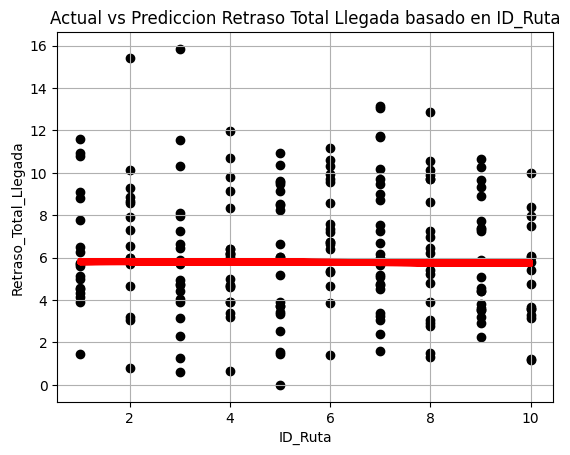

In [26]:
# Plot the testing data and predicted data
# We will plot against the 'Ciudad' column from X_test
plt.scatter(X_test['ID_Ruta'], y_test,  color='black')
plt.plot(X_test['ID_Ruta'], prediction_y, color='red', linewidth=3)
plt.xlabel('ID_Ruta')
plt.ylabel('Retraso_Total_Llegada')
plt.title('Actual vs Prediccion Retraso Total Llegada basado en ID_Ruta')
plt.grid(True)
plt.show()

# Aprendizaje no Supervisado

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset con el delimitador correcto y especificar la codificación
try:
    df = pd.read_csv("transporte_masivo_data.csv", sep=',', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("transporte_masivo_data.csv", sep=',', encoding='latin1')


# Convertir la columna 'Tiempo_Viaje_Real' a numérico
# Se corrige un posible problema de formato en la generación de datos (valores grandes)
# Se reemplazan comas por puntos en caso de haberlas y se convierten a float.
df['Tiempo_Viaje_Real'] = df['Tiempo_Viaje_Real'].astype(str).str.replace(',', '.', regex=True)
# Manejo de error si hay valores muy grandes o inválidos
df['Tiempo_Viaje_Real'] = pd.to_numeric(df['Tiempo_Viaje_Real'], errors='coerce')

# Eliminar cualquier fila con valores nulos resultantes de la limpieza
df.dropna(inplace=True)

print(f"Número de registros limpios: {len(df)}")

Número de registros limpios: 1000


In [30]:
# 1. Selección de Características (Features)
features = [
    'Retraso_Total_Llegada',
    'Tiempo_Viaje_Real',
    'Num_Pasajeros_Total',
    'Día_Semana',
    'Clima'
]
data_model = df[features].copy()

# 2. Codificación de Variables Categóricas (One-Hot Encoding)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data_model[['Día_Semana', 'Clima']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Día_Semana', 'Clima']))

# Unir con las variables numéricas
X = pd.concat([data_model.reset_index(drop=True).drop(columns=['Día_Semana', 'Clima']), encoded_df], axis=1)

# 3. Escalado de Datos Numéricos (Estandarización)
# K-Means es sensible a la escala de las variables.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nDimensiones de los datos escalados para K-Means:", X_scaled.shape)


Dimensiones de los datos escalados para K-Means: (1000, 15)


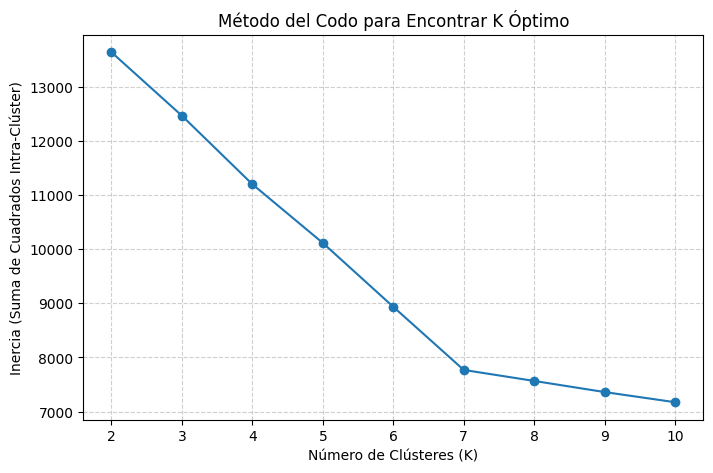

In [31]:
# Rango de K a probar
k_range = range(2, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Encontrar K Óptimo')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia (Suma de Cuadrados Intra-Clúster)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Base en el gráfico, elegiremos K=4 como ejemplo (asumiendo que ahí se ve un 'codo')
K_OPTIMO = 4

In [32]:
# Entrenar K-Means con K óptimo
kmeans = KMeans(n_clusters=K_OPTIMO, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(f"\nDistribución de registros por clúster (K={K_OPTIMO}):")
print(df['Cluster'].value_counts().sort_index())


Distribución de registros por clúster (K=4):
Cluster
0    212
1    201
2    205
3    382
Name: count, dtype: int64


In [35]:
# Análisis de los Centroides (Valores Medios)
cluster_analysis = df.groupby('Cluster')[
    ['Retraso_Total_Llegada', 'Tiempo_Viaje_Real', 'Num_Pasajeros_Total', 'Distancia_Ruta_KM']
].mean().round(2)

print("\nAnálisis de Centroides (Valores Medios por Clúster):")
print(cluster_analysis)

# Análisis de Variables Categóricas (Moda o Distribución)
# Ejemplo: Días más comunes por clúster
moda_dia = df.groupby('Cluster')['Día_Semana'].agg(lambda x: x.mode()[0])
print("\nDía de la Semana más común (Moda) por Clúster:")
print(moda_dia)


Análisis de Centroides (Valores Medios por Clúster):
         Retraso_Total_Llegada  Tiempo_Viaje_Real  Num_Pasajeros_Total  \
Cluster                                                                  
0                         5.81              40.09               310.02   
1                         5.83              38.45               325.86   
2                         5.69              39.23               332.22   
3                         6.08              41.08               333.91   

         Distancia_Ruta_KM  
Cluster                     
0                    17.51  
1                    16.59  
2                    16.94  
3                    17.94  

Día de la Semana más común (Moda) por Clúster:
Cluster
0    Domingo
1     Martes
2    Domingo
3     Jueves
Name: Día_Semana, dtype: object
